In [1]:
!pip install klib

In [2]:
import klib
import pandas as pd
import numpy as np

In [3]:
data_frame = pd.read_csv(r"D:\Data\Machine_Learning\churn_dataset.csv")

## Key features:
- visualize missing data using the missingval_plot function
- perform data cleaning using the data_cleaning function
- visualize the data distribution plot using the dist_plot function
- visualize the correlation plot using the corr_plot function
- visualize categorical column values using the cat_plot function

## klib.clean - functions for cleaning datasets
- klib.data_cleaning() - performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
- klib.clean_column_names() - cleans and standardizes column names, also called inside data_cleaning()
- klib.convert_datatypes() - converts existing to more efficient dtypes, also called inside data_cleaning()
- klib.drop_missing() - drops missing values, also called in data_cleaning()
- klib.mv_col_handling() - drops features with high ratio of missing vals based on informational content
- klib.pool_duplicate_subsets() - pools subset of cols based on duplicates with min. loss of information

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Missing Values Plot

- *missingval_plot()* - provides a high-level overview of the missing values in a dataset. it will give very detaily.
- Top portion of the plot shows the aggregate for each column. Summary statistics is displayed on the right most side.
- Bottom portion of the plot shows the missing values (black colors) in the DataFrame.

In [5]:
klib.missingval_plot(data_frame) # default representation of missing values in a DataFrame, plenty of settings are available

No missing values found in the dataset.


## Data Cleaning
The *data_cleaning()* function essentially drops empty and single valued columns as well as empty and duplicate rows.

In [6]:
df_cleaned = klib.data_cleaning(data_frame)

Shape of cleaned data: (7043, 21) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.87 MB (-76.99%)



In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customer_id        7043 non-null   string  
 1   gender             7043 non-null   category
 2   senior_citizen     7043 non-null   int8    
 3   partner            7043 non-null   category
 4   dependents         7043 non-null   category
 5   tenure             7043 non-null   int8    
 6   phone_service      7043 non-null   category
 7   multiple_lines     7043 non-null   category
 8   internet_service   7043 non-null   category
 9   online_security    7043 non-null   category
 10  online_backup      7043 non-null   category
 11  device_protection  7043 non-null   category
 12  tech_support       7043 non-null   category
 13  streaming_tv       7043 non-null   category
 14  streaming_movies   7043 non-null   category
 15  contract           7043 non-null   category
 16  paperl

In [11]:
df_cleaned.describe()

,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761696
std,0.368612,24.559481,30.089973
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.349998
75%,0.000000,55.000000,89.849998
max,1.000000,72.000000,118.750000


In [12]:
klib.clean_column_names(df_cleaned) # cleans and standardizes column names, also called inside data_cleaning()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800003,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.199997,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400002,306.6,Yes


In [13]:
klib.convert_datatypes(df_cleaned) # converts existing to more efficient dtypes, also called inside data_cleaning()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800003,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.199997,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400002,306.6,Yes


In [14]:
klib.drop_missing(df_cleaned) # drops missing values, also called in data_cleaning()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800003,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.199997,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400002,306.6,Yes


In [15]:
klib.mv_col_handling(df_cleaned) # drops features with high ratio of missing vals based on informational content

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800003,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.199997,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400002,306.6,Yes


In [16]:
klib.pool_duplicate_subsets(df_cleaned) # pools subset of columns based on duplicates with min. loss of information

,customer_id,tenure,monthly_charges,total_charges,pooled_vars
0,7590-VHVEG,1,29.850000,29.85,0
1,5575-GNVDE,34,56.950001,1889.5,1
2,3668-QPYBK,2,53.849998,108.15,2
3,7795-CFOCW,45,42.299999,1840.75,3
4,9237-HQITU,2,70.699997,151.65,4
...,...,...,...,...,...
7038,6840-RESVB,24,84.800003,1990.5,7038
7039,2234-XADUH,72,103.199997,7362.9,5323
7040,4801-JZAZL,11,29.600000,346.45,7040
7041,8361-LTMKD,4,74.400002,306.6,2168


# Visualizations
## klib.describe - functions for visualizing datasets
- klib.cat_plot() - returns a visualization of the number and frequency of categorical features
- klib.corr_mat() - returns a color-encoded correlation matrix
- klib.corr_plot() - returns a color-encoded heatmap, ideal for correlations
- klib.corr_interactive_plot().show() - returns an interactive correlation plot using plotly
- klib.dist_plot() - returns a distribution plot for every numeric feature
- klib.missingval_plot() - returns a figure containing information about missing values

GridSpec(6, 18)

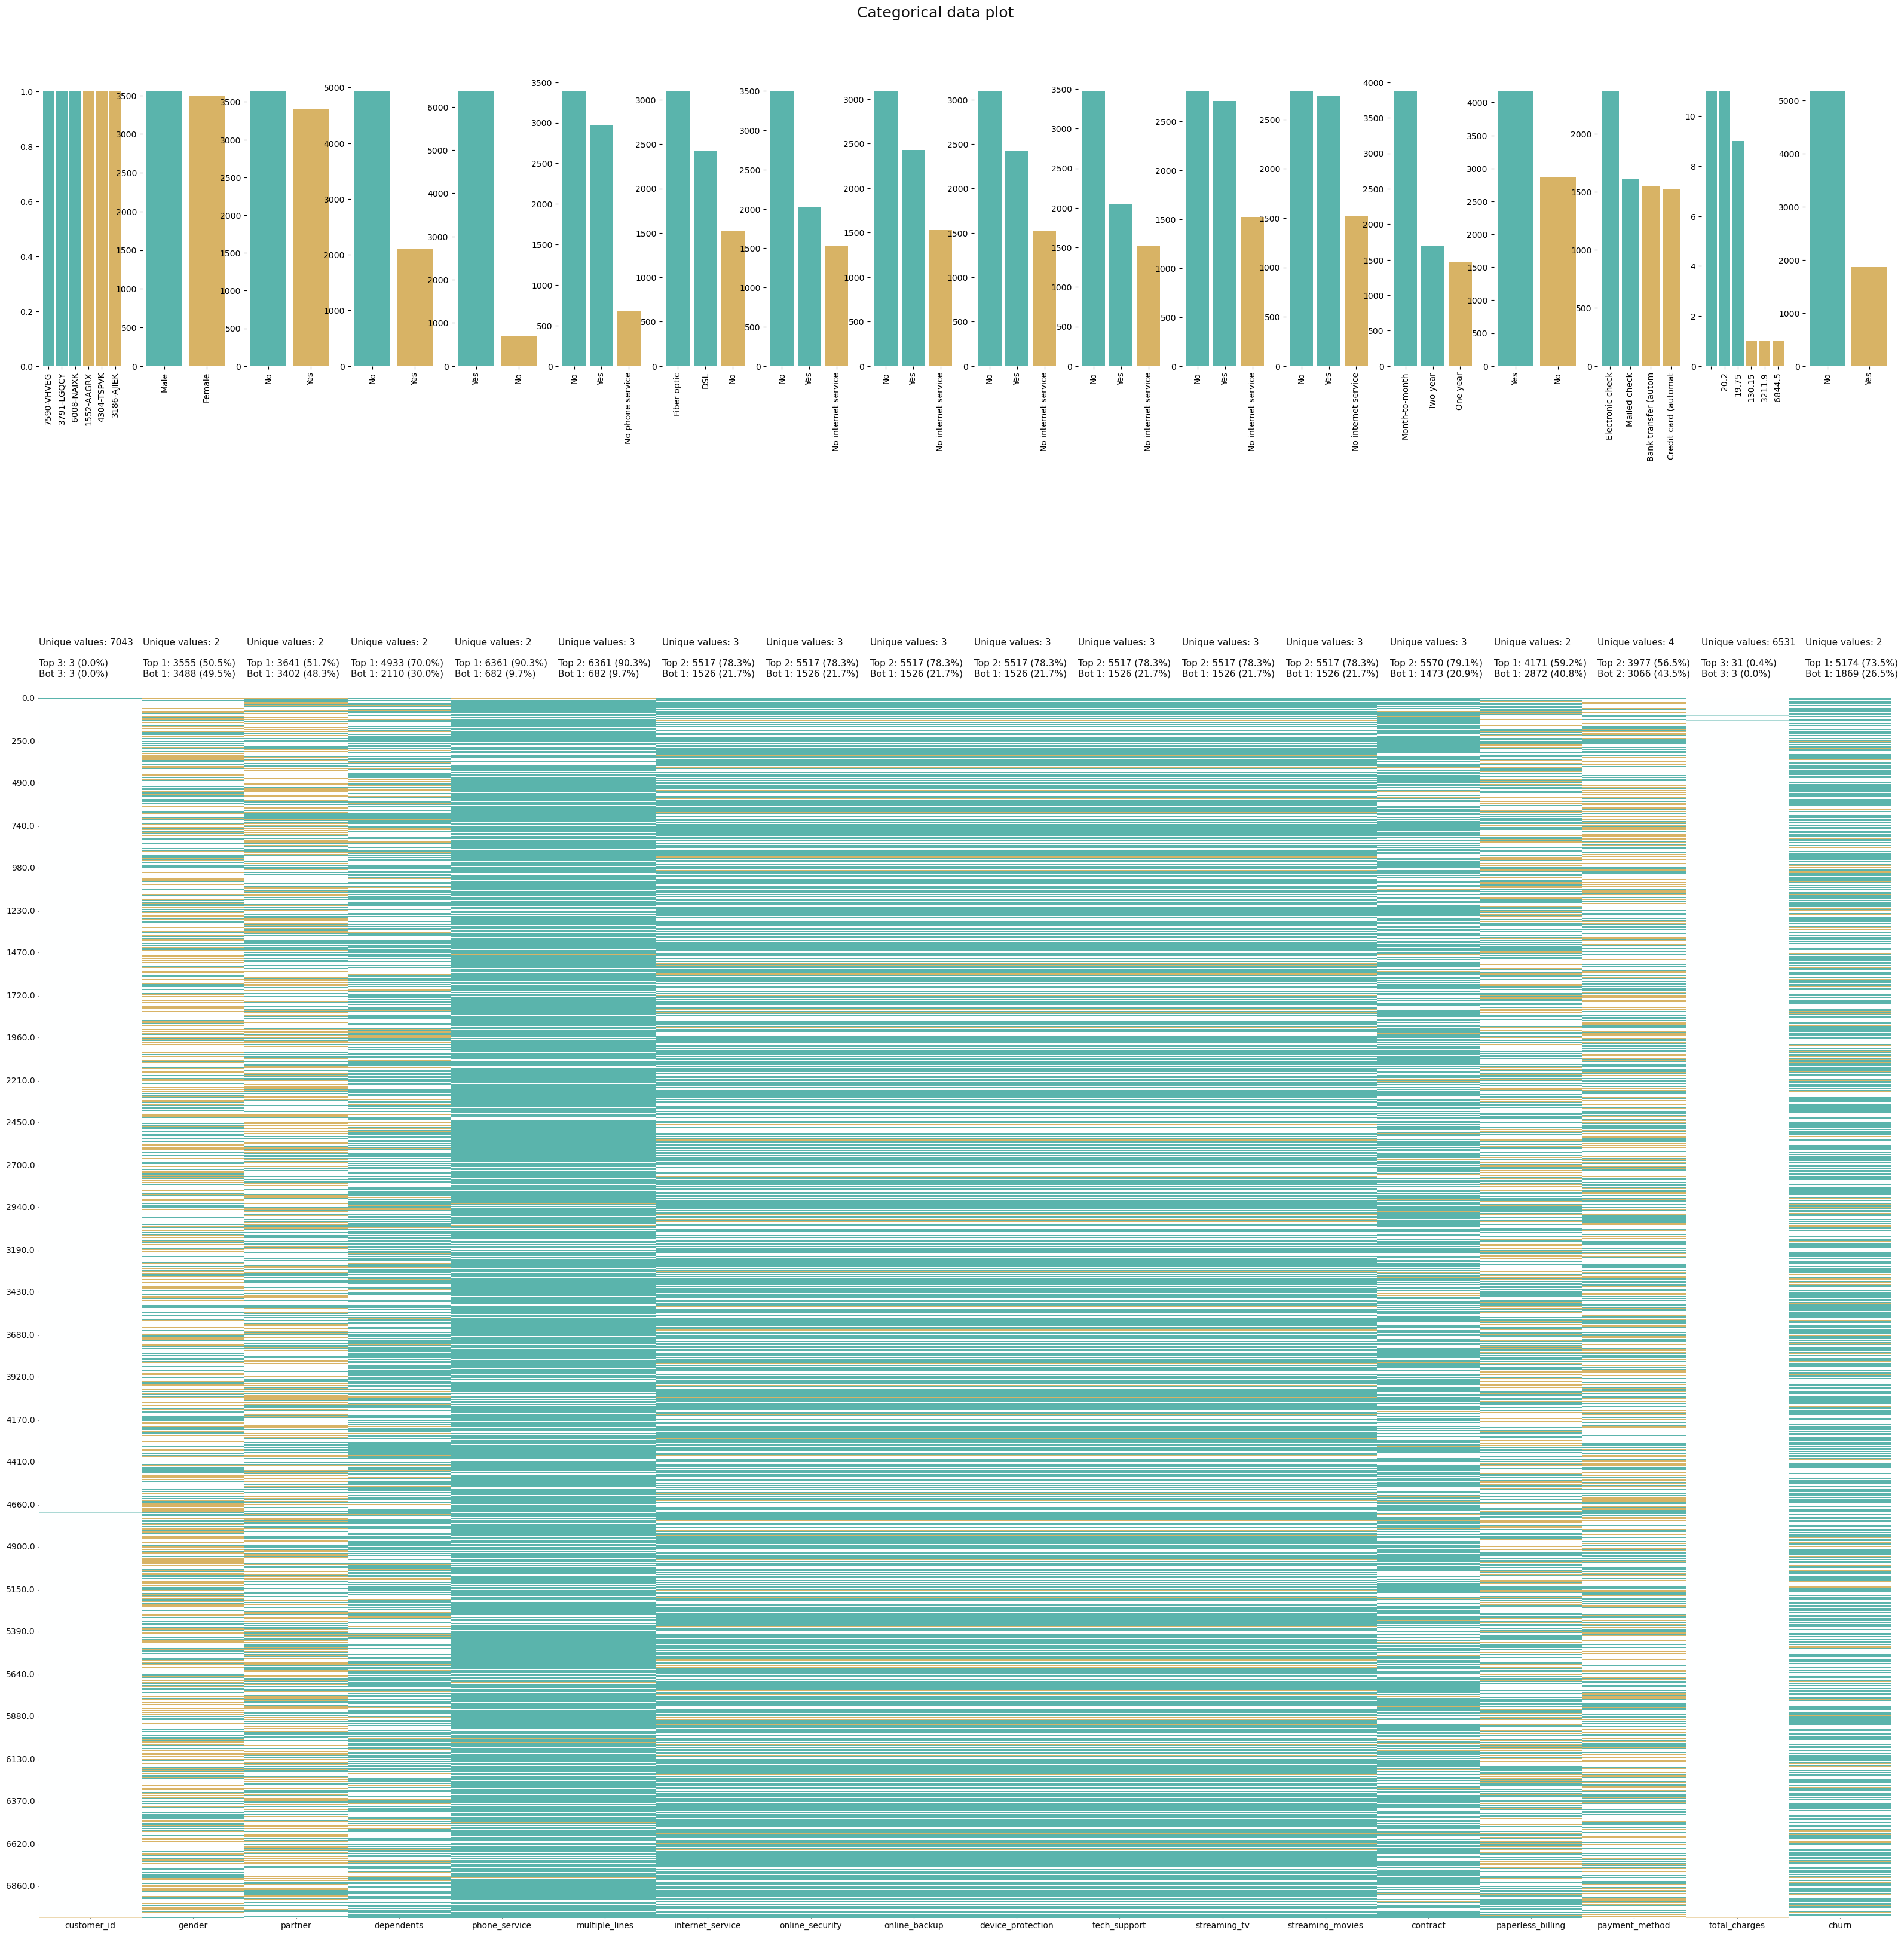

In [27]:
klib.cat_plot(df_cleaned, figsize = (40,40))# returns a visualization of the number and frequency of categorical features

## Correlation Data Matrix for the loan data

In [28]:
klib.corr_mat(df_cleaned) #returns a color-encoded correlation matrix

,senior_citizen,tenure,monthly_charges
senior_citizen,1.00,0.02,0.22
tenure,0.02,1.00,0.25
monthly_charges,0.22,0.25,1.00


## Correlation plots for the loan data

<Axes: title={'center': 'Feature-correlation (pearson)'}>

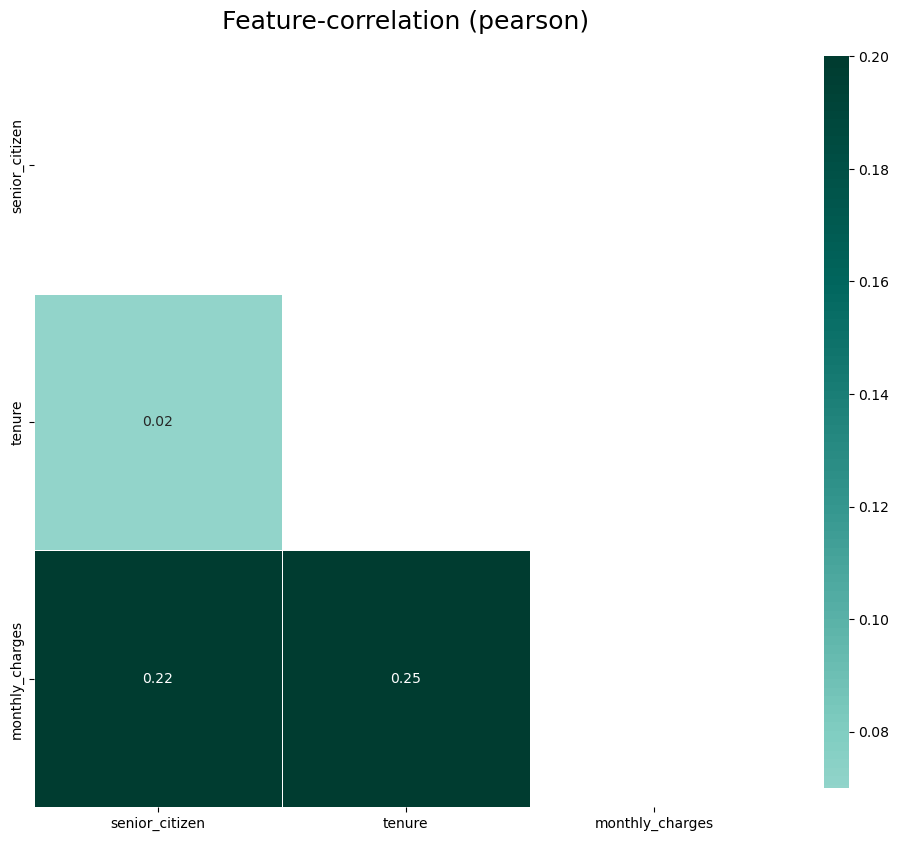

In [35]:
klib.corr_plot(df_cleaned)# returns a color-encoded heatmap, ideal for correlations

<Axes: title={'center': 'Feature-correlation (pearson)'}>

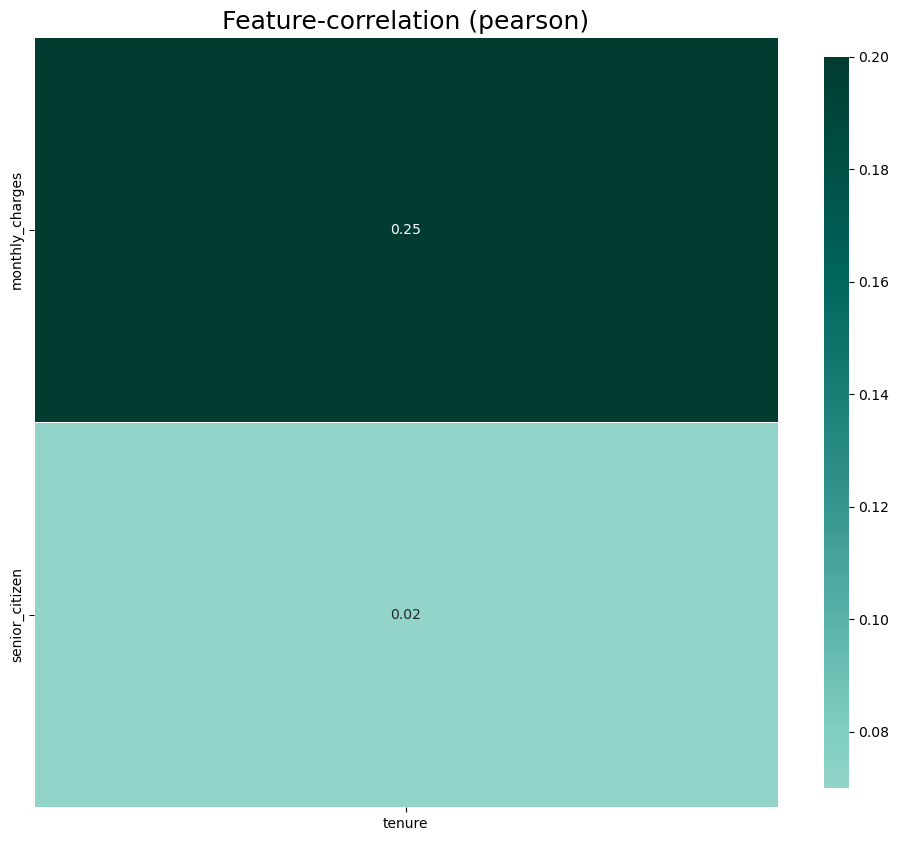

In [39]:
klib.corr_plot(df_cleaned, target='tenure')

In [42]:
klib.corr_interactive_plot(df_cleaned,figsize= (7, 4)).show()# returns an interactive correlation plot using plotly

## Distribution Plot
Displays the distribution plot for every numeric feature and columns of interest.

<Axes: xlabel='tenure', ylabel='Density'>

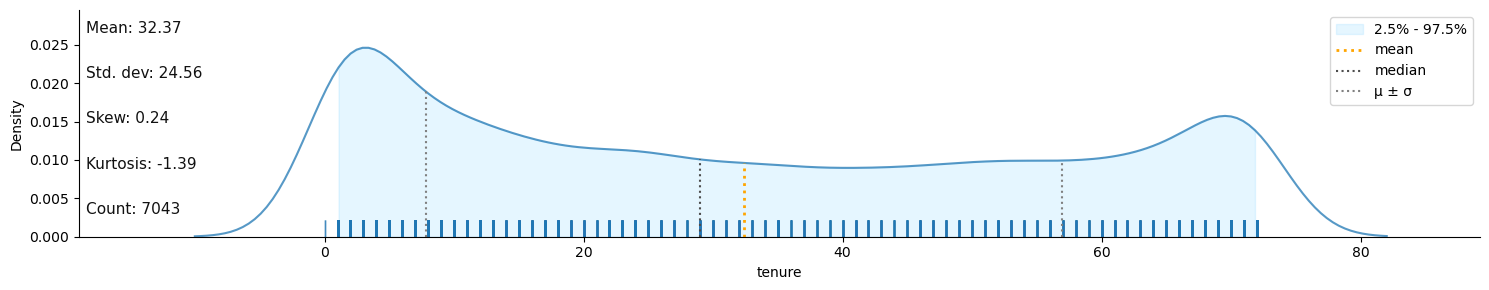

In [43]:
klib.dist_plot(df_cleaned)# returns a distribution plot for every numeric feature

<Axes: xlabel='monthly_charges', ylabel='Density'>

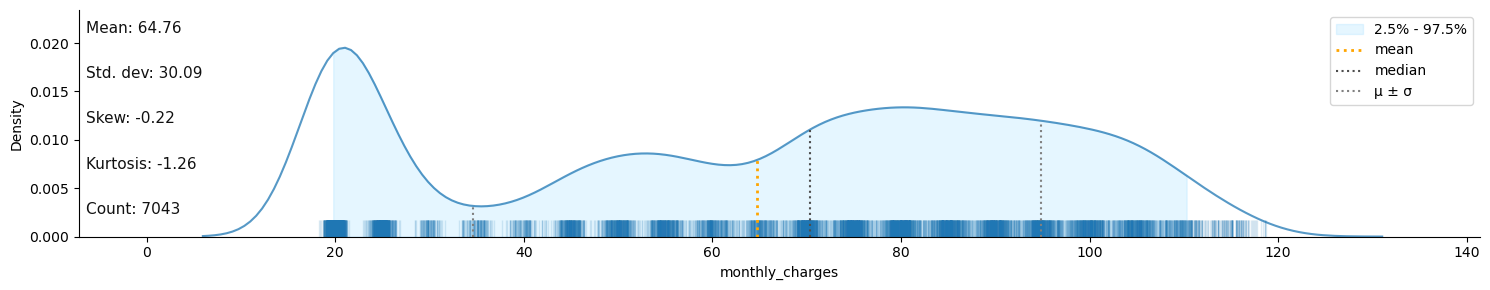

In [46]:
klib.dist_plot(df_cleaned.monthly_charges)# returns a distribution plot for every numeric feature